# Prediction Explainers for Convolutional Neural Networks

This tutorial demonstrates how to use various prediction explainers for image classification uisng TensorWatch. To start with, let's import everything we will need.

**Credits**: This feature is built upon by excellent [Visual Attribution](https://github.com/yulongwang12/visual-attribution) library.

In [1]:
from tensorwatch.saliency import saliency
from tensorwatch import image_utils, imagenet_utils, pytorch_utils

For this tutorial we will use pretrained model for Resnet50 available in PyTorch 1.x. So let's load that model:

In [2]:
model = pytorch_utils.get_model('resnet50')

We will use an image of dog+cat to do classification and explain that prediction. This image is available at `data/test_images/dogs.png` in your repo folder. Let's take a look at this image:

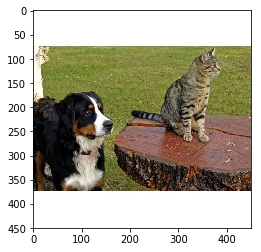

In [3]:
img = image_utils.open_image('../data/test_images/dogs.png', convert_mode='RGB')
image_utils.show_image(img)

Now let's feed this image to our Imagenet model and see the predictions we get.

In [4]:
probabilities = imagenet_utils.predict(model=model, images=[img])

So we get here probability for each of the 1000 classes in Imagenet. This is not very human friendly output so let's convert class indexes to class names and get only the top 5 predictions. The tuple below has has following elements: (probability, class_index, class_name, class_label):

In [5]:
imagenet_utils.probabilities2classes(probabilities, topk=5)

((0.47301257, 239, 'Bernese_mountain_dog', 'n02107683'),
 (0.18005021, 240, 'Appenzeller', 'n02107908'),
 (0.08727159, 281, 'tabby', 'n02123045'),
 (0.055996247, 241, 'EntleBucher', 'n02108000'),
 (0.05060726, 282, 'tiger_cat', 'n02123159'))

Notice that our image has dog as well as cat but the top prediction by wide margin is class index 239 corresponding to a dog. Now we want to figure out what in the image is making our model to predict this. To do this, we need input and output as tensors and then feed it to TensorWatch utility method to get the saliency results.

In [6]:
input_tensor = imagenet_utils.image2batch(img)
prediction_tensor = pytorch_utils.int2tensor(239)

With below one liner we will receive output of 6 different explanation methods by default: `lime_imagenet, gradcam, smooth_grad, guided_backprop, deeplift, grad_x_input`. Besides these following additional methods are also available: `vanilla_grad, integrate_grad, deconv, smooth_grad, occlusion, lrp`. There are more methods available as well and you can explicitly specify these methods in `methods` parameter in below call. 

Note: Currently the `gradcam` requires specific layer names or you won't get output.

In [7]:
results = saliency.get_image_saliency_results(model, img, input_tensor, prediction_tensor)

The results above is an array of `ImageSaliencyResult` object. TensorWatch has handy method to visualize these results:

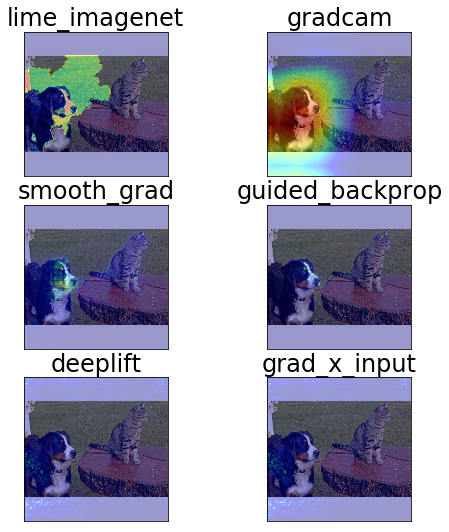

In [8]:
figure = saliency.get_image_saliency_plot(results)